# Tutorial. Computing cdf and pdf of normal mixtures

Let's create simplest Normal Mean Mixture in classical form with parameters $\alpha = 0$, $\beta = 1$, $\gamma = 1$ and standart exponential mixing density. 

In [2]:
import pandas as pd
import numpy as np
from src.mixtures.nm_mixture import *
from scipy.stats import expon
mixture = NormalMeanMixtures("classical", alpha=0, beta=1, gamma=1, distribution=expon)

Firstly, we will randomly draw some points from this distribution:

In [3]:
from src.generators.nm_generator import NMGenerator
generator = NMGenerator()
sample = generator.classical_generate(mixture, 250)

Let's build a histogram over this sample and permorm KDE on this data:

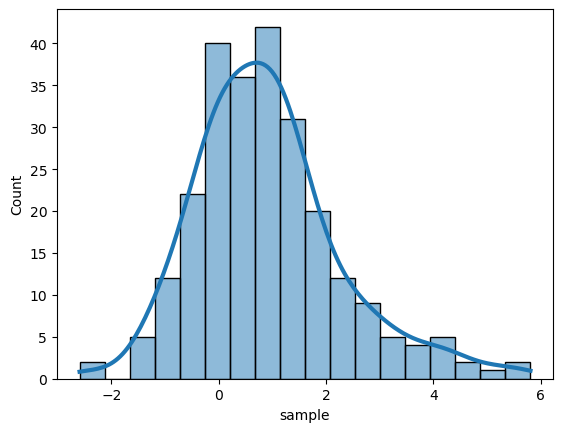

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sample = pd.Series(sample, name = "sample")
sns.histplot(data=sample, kde=True, line_kws = {"linewidth" : 3});

Now let's numerically compute density and compare it's to estimated via KDE:

In [6]:
import warnings
warnings.filterwarnings("ignore")
grid = np.linspace(-10, 10, 1000)
mixture_pdf_value = []
mixture_pdf_error = []
for (i, x) in enumerate(grid):
    estimated_density = mixture.compute_pdf(x, {"error_tolerance" : 0.01})
    mixture_pdf_value.append(estimated_density[0])
    mixture_pdf_error.append(estimated_density[1])
    if i % 100 == 0:
        print("#", end='')

##########

Let's plot our density with estimated error

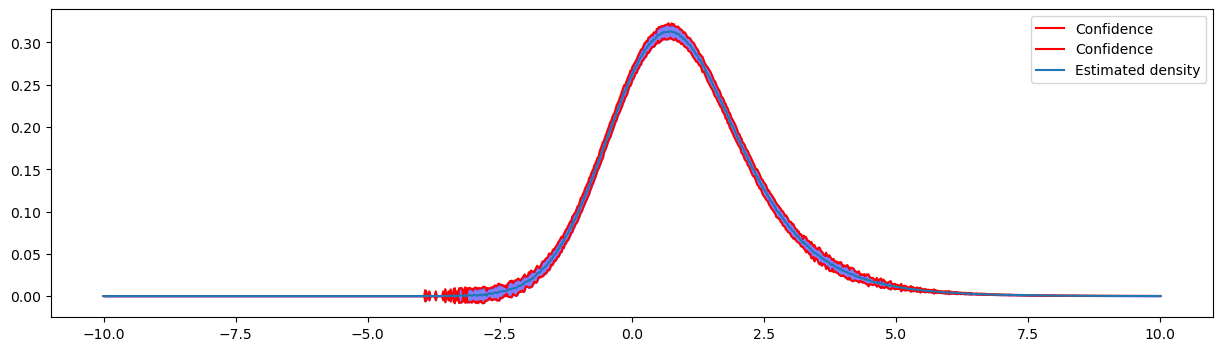

In [7]:
mixture_pdf_value = np.array(mixture_pdf_value)
mixture_pdf_error = np.array(mixture_pdf_error)
fig = plt.figure(figsize=(15,4))
upper_error_plot = sns.lineplot(x=grid, y=mixture_pdf_value + mixture_pdf_error, label='Confidence', color='r')
lower_error_plot = sns.lineplot(x=grid, y=mixture_pdf_value - mixture_pdf_error, label='Confidence', color='r')
estimated_plot   = sns.lineplot(x=grid, y=mixture_pdf_value, label = 'Estimated density')

line = estimated_plot.get_lines()
plt.fill_between(line[2].get_xdata(), line[0].get_ydata(), line[1].get_ydata(), color='blue', alpha=.5)


Finally, let's compare with KDE:

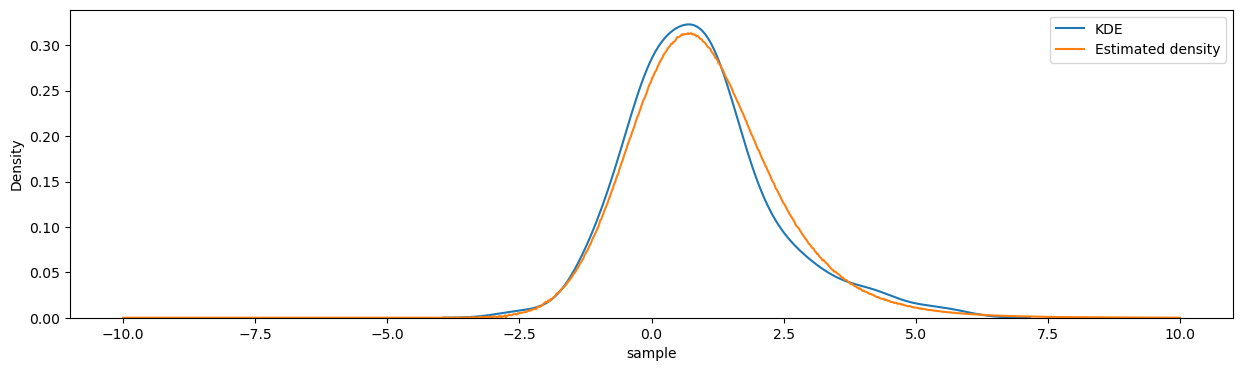

In [8]:
fig = plt.figure(figsize=(15,4))
kde_plot = sns.kdeplot(data=sample, label = 'KDE')
estimated_plot = sns.lineplot(x=grid, y=mixture_pdf_value, label = 'Estimated density')